In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [391]:
TEST_PATH = '/home/nick/Desktop/experiments_results/milan_processed_test.npz'
RESULTS_PATH = '/home/nick/Desktop/experiments_results/'
cnn_3d =  'cnn_3d_more_epochs/'
deep_conv_lstm = 'new_conv_lstm_lr_-3_in12_out10_no_shuffle_before_split/'
shallow_conv_lstm = 'conv_lstm_lr_-3_in12_out10_no_shuffle_before_split/'
predrnn_pp = 'pred_rnn_pp_less_mem_lr-3_grad_clip_10/'
predrnn_full = 'pred_rnn_pp_less_mem_lr-3_more_epochs/'
PREDICTIONS_PATH = 'example_predictions/test_predictions.npz'
x = np.load(TEST_PATH)['x']
y = np.load(TEST_PATH)['y']

pred_cnn = np.load(RESULTS_PATH+cnn_3d+PREDICTIONS_PATH)['y']
pred_deep = np.load(RESULTS_PATH+deep_conv_lstm+PREDICTIONS_PATH)['y']
pred_shallow = np.load(RESULTS_PATH+shallow_conv_lstm+PREDICTIONS_PATH)['y']
pred_pred_rnn = np.load(RESULTS_PATH+predrnn_pp+PREDICTIONS_PATH)['y']
pred_pred_rnn_full = np.load(RESULTS_PATH+predrnn_full+PREDICTIONS_PATH)['y']

In [397]:
pred_deep = pred_deep.transpose(0,1,3,4,2)
pred_deep = pred_deep.reshape([-1,100,100,10])

pred_shallow = pred_shallow.transpose(0,1,3,4,2)
pred_shallow = pred_shallow.reshape([-1,100,100,10])

pred_cnn = pred_cnn.transpose(0,1,3,4,2)
pred_cnn = pred_cnn.reshape([-1,100,100,10])

pred_pred_rnn = pred_pred_rnn.transpose(0,1,3,4,2)
pred_pred_rnn = pred_pred_rnn.reshape([-1,100,100,10])

pred_pred_rnn_full = pred_pred_rnn_full.transpose(0,1,3,4,2)
pred_pred_rnn_full = pred_pred_rnn_full.reshape([-1,100,100,10])

In [398]:
MSE_deep = ((y - pred_deep)**2).sum(axis = (1,2)).mean()
MSE_shallow = ((y - pred_shallow)**2).sum(axis = (1,2)).mean()
MSE_cnn = ((y - pred_cnn)**2).sum(axis = (1,2)).mean()
MSE_pred_rnn = ((y - pred_pred_rnn)**2).sum(axis = (1,2)).mean()
MSE_pred_rnn_full = ((y - pred_pred_rnn_full)**2).sum(axis = (1,2)).mean()

In [135]:
print(MSE_deep)
print(MSE_shallow)
print(MSE_cnn)
print(MSE_pred_rnn)
print(MSE_pred_rnn_full)

360.7426764464058
356.1074240177909
384.55465006265564
277.19292433095256
181.90093040555917


### SSIM / PSNR

In [406]:
from skimage import measure 

tot = 0
SSIM_deep = 0
SSIM_shallow = 0
SSIM_cnn = 0
SSIM_pred_rnn = 0
PSNR_deep = 0
PSNR_shallow = 0
PSNR_cnn = 0
PSNR_pred_rnn = 0
for i in range(y.shape[0]):
    for j in range(y.shape[3]):
        tot+=1
        SSIM_deep += measure.compare_ssim(y[i,...,j],pred_deep[i,...,j])
        SSIM_shallow += measure.compare_ssim(y[i,...,j],pred_shallow[i,...,j])
        SSIM_cnn += measure.compare_ssim(y[i,...,j],pred_cnn[i,...,j])
        SSIM_pred_rnn += measure.compare_ssim(y[i,...,j],pred_pred_rnn_full[i,...,j])
        
        PSNR_deep += measure.compare_psnr(y[i,...,j],pred_deep[i,...,j],data_range=37)
        PSNR_shallow += measure.compare_psnr(y[i,...,j],pred_shallow[i,...,j],data_range=37)
        PSNR_cnn += measure.compare_psnr(y[i,...,j],pred_cnn[i,...,j],data_range=37)
        PSNR_pred_rnn += measure.compare_psnr(y[i,...,j],pred_pred_rnn_full[i,...,j],data_range=37)


In [407]:
print(SSIM_deep / tot)
print(SSIM_shallow / tot)
print(SSIM_cnn /tot)
print(SSIM_pred_rnn / tot)

print(PSNR_deep / tot)
print(PSNR_shallow / tot)
print(PSNR_cnn /tot)
print(PSNR_pred_rnn / tot)

0.8117999268363737
0.793075666648053
0.7618796661793856
0.8357093721774009
48.76544122597442
48.451057984486496
48.13194955107289
50.89356525025178


### Plot example predictions 

In [501]:
rc = {"axes.spines.left" : True,
      "axes.spines.right" : True,
      "axes.spines.bottom" : True,
      "axes.spines.top" : True,
      "xtick.bottom" : True,
      "xtick.labelbottom" : True,
      "ytick.labelleft" : True,
      "ytick.left" : True}
plt.rcParams.update(rc)

In [393]:
def plot_single_prediction_example_on_cell_58_50_with_input(index):
    x_axis = np.arange(22)
    coords = (58,50)
    
    input_ = x[index,coords[0],coords[1],:]
    y_ = np.concatenate((input_,y[index,coords[0],coords[1],:]))
    pred_shallow_ = np.concatenate((input_,pred_shallow[index,coords[0],coords[1],:]))
    pred_deep_ = np.concatenate((input_,pred_deep[index,coords[0],coords[1],:]))
    pred_cnn_ = np.concatenate((input_,pred_cnn[index,coords[0],coords[1],:]))
    pred_pred_rnn_ = np.concatenate((input_,pred_pred_rnn[index,coords[0],coords[1],:]))
    pred_pred_rnn_full_ = np.concatenate((input_,pred_pred_rnn_full[index,coords[0],coords[1],:]))
    plt.plot(x_axis,pred_shallow_,'k-o',label='shallow ConvLSTM')
    plt.plot(x_axis,pred_deep_,'k--o',label='deep ConvLSTM')
    plt.plot(x_axis,pred_cnn_,'r-o',label='3D CNN')
#     plt.plot(x_axis,pred_pred_rnn_,'g--o',label='PredRNN++')
    plt.plot(x_axis,pred_pred_rnn_full_,'g-o',label='PredRNN++')
    plt.plot(x_axis,y_,'b-o',label='ground truth')
    
    plt.axvline(x=11,c ='grey',label='prediction begins')
    
    plt.legend(loc='lower left')

In [399]:
pred_shallow.shape

(430, 100, 100, 10)

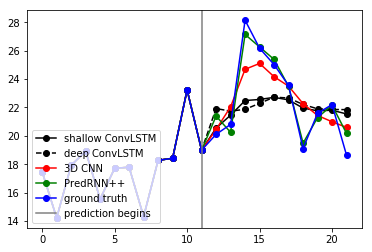

In [401]:
plot_single_prediction_example_on_cell_58_50_with_input(88)

In [370]:
def plot_single_prediction_example_on_cell_58_50(index):
    x_axis = np.arange(10)
    plt.plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    plt.plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    plt.plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    plt.plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
#     plt.plot(x_axis,pred_pred_rnn[index,50,50,:],'g--o',label='PredRNN++')
    plt.plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    plt.ylabel('Scaled Traffic')
    plt.xlabel('timestep')
    plt.legend()
    

In [532]:
def plot_3x3_prediction_examples_on_cell_58_50():
    x_axis = np.arange(10) + 1
    
    fig,ax = plt.subplots(3,3,figsize=(15,15))
    index = 99
    
    
    
    ax[0,0].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[0,0].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[0,0].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[0,0].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[0,0].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[0,0].set_ylabel('Scaled Traffic',fontsize=16)
    ax[0,0].set_xlabel('timestep',fontsize=16)
    ax[0,0].set_ylim(20,40)

    index = 50

    ax[0,1].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[0,1].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[0,1].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[0,1].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[0,1].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[0,1].set_ylabel('Scaled Traffic',fontsize=16)
    ax[0,1].set_xlabel('timestep',fontsize=16)
    ax[0,1].set_ylim(20,40)
    index = 24

    ax[0,2].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[0,2].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[0,2].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[0,2].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[0,2].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[0,2].set_ylabel('Scaled Traffic',fontsize=16)
    ax[0,2].set_xlabel('timestep',fontsize=16)
    ax[0,2].set_ylim(20,40)

    index = 3

    ax[1,0].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[1,0].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[1,0].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[1,0].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[1,0].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[1,0].set_ylabel('Scaled Traffic',fontsize=16)
    ax[1,0].set_xlabel('timestep',fontsize=16) 
    ax[1,0].set_ylim(5,30)
    ax[1,0].legend(prop={'size':16})

    index = 15

    ax[1,1].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[1,1].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[1,1].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[1,1].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[1,1].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[1,1].set_ylabel('Scaled Traffic',fontsize=16)
    ax[1,1].set_xlabel('timestep',fontsize=16) 
    ax[1,1].set_ylim(5,30)
    index = 64

    ax[1,2].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[1,2].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[1,2].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[1,2].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[1,2].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[1,2].set_ylabel('Scaled Traffic',fontsize=16)
    ax[1,2].set_xlabel('timestep',fontsize=16)  
    ax[1,2].set_ylim(5,30)
    
    index = 5

    ax[2,0].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[2,0].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[2,0].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[2,0].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[2,0].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[2,0].set_ylabel('Scaled Traffic',fontsize=16)
    ax[2,0].set_xlabel('timestep',fontsize=16) 
    ax[2,0].set_ylim(-.5,2)

    index = 120

    ax[2,1].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[2,1].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[2,1].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[2,1].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[2,1].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[2,1].set_ylabel('Scaled Traffic',fontsize=16)
    ax[2,1].set_xlabel('timestep',fontsize=16)
    ax[2,1].set_ylim(-.5,2)
    
    index = 400

    ax[2,2].plot(x_axis,y[index,58,50,:],'b-o',label='ground truth')
    ax[2,2].plot(x_axis,pred_shallow[index,58,50,:],'k-o',label='shallow ConvLSTM')
    ax[2,2].plot(x_axis,pred_deep[index,58,50,:],'k--o',label='deep ConvLSTM')
    ax[2,2].plot(x_axis,pred_cnn[index,58,50,:],'r-o',label='3D CNN')
    ax[2,2].plot(x_axis,pred_pred_rnn_full[index,58,50,:],'g-o',label='PredRNN++')
    ax[2,2].set_ylabel('Scaled Traffic',fontsize=16)
    ax[2,2].set_xlabel('timestep',fontsize=16)
    ax[2,2].set_ylim(-.5,2)
    
    fig.suptitle('Example Predictions Of Different Models for Cell (58,50)',fontsize=28)
    fig.subplots_adjust(top = 0.92,wspace=0.35)
    
    for i in range(3):
        for j in range(3):
            ax[i,j].set_xticks(x_axis)
    
    plt.savefig('Example_Preds.pdf')
    return ax

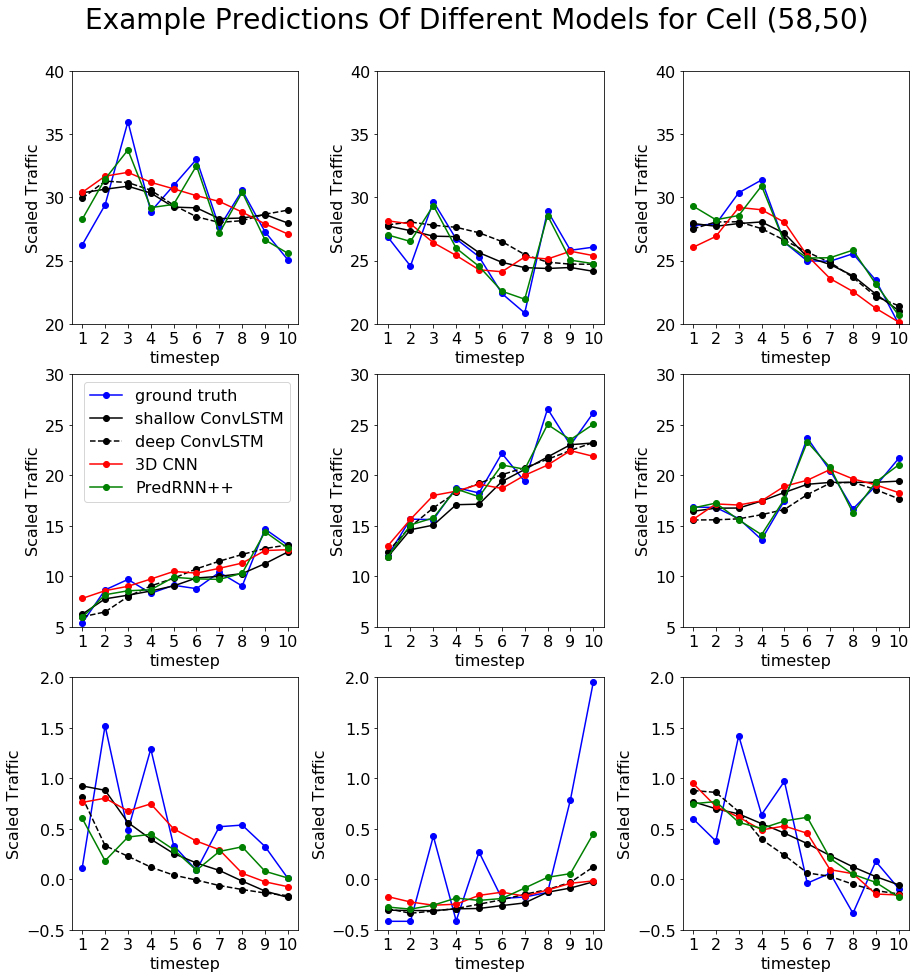

In [533]:
_ = plot_3x3_prediction_examples_on_cell_58_50()

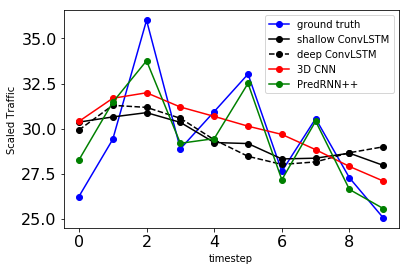

In [534]:
plot_single_prediction_example_on_cell_58_50(99)

In [72]:
def plot_single_prediction_example_on_cell_50_50(index):
    x_axis = np.arange(10)
    plt.plot(x_axis,y[index,50,50,:],'b-o',label='ground_truth')
    plt.plot(x_axis,pred_shallow[index,50,50,:],'k-o',label='shallow ConvLSTM')
    plt.plot(x_axis,pred_deep[index,50,50,:],'k--o',label='deep ConvLSTM')
    plt.plot(x_axis,pred_cnn[index,50,50,:],'r-o',label='3D CNN')
#     plt.plot(x_axis,pred_pred_rnn[index,50,50,:],'g--o',label='PredRNN++')
    plt.plot(x_axis,pred_pred_rnn_full[index,50,50,:],'g-o',label='PredRNN++')
    plt.legend()

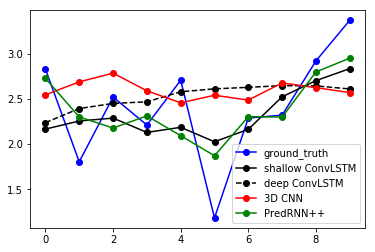

In [73]:
plot_single_prediction_example_on_cell_50_50(89)

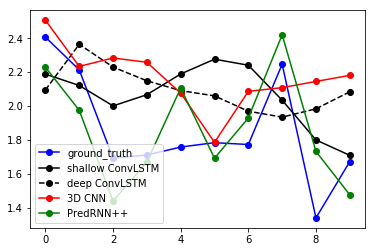

In [74]:
plot_single_prediction_example_on_cell_50_50(140)

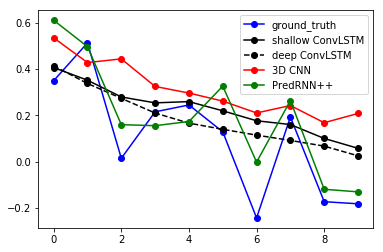

In [75]:
plot_single_prediction_example_on_cell_50_50(180)

#### visualizing full predictions 

In [181]:
from matplotlib.colors import Normalize

norm = Normalize(vmin=0,vmax=30)
cmap = 'nipy_spectral'
# plt.figure(figsize=(20,10))
# plt.imshow(raw[...,0],origin='lower',norm=norm,cmap=cmap)
# plt.title('Plot of data traffic on Milano grid at t=0',fontsize=16)
# plt.xlabel('x coordinate',fontsize=16)
# plt.ylabel('y coordinate',fontsize=16)
# plt.colorbar()
# plt.savefig('one_timestep_visualisation.pdf')

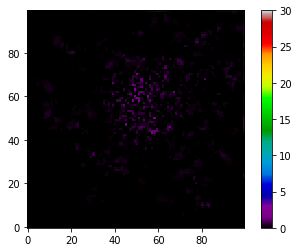

In [182]:
coords = (58,50)
index = 99

gt_ = y[index,:,:,0]
pp_ = pred_pred_rnn_full[index,:,:,0]
cc_ = pred_shallow[index,:,:,0]
plt.imshow(gt_ - pp_,origin='lower',norm=norm,cmap=cmap)


plt.colorbar()


### Learning Curves 

In [81]:
val_plotter = pd.DataFrame()

In [82]:
predrnn_curve = pd.read_csv(RESULTS_PATH+predrnn_pp+'result_outputs/summary.csv')
shallow_convlstm_curve = pd.read_csv(RESULTS_PATH+shallow_conv_lstm+'result_outputs/summary.csv')
deep_convlstm_curve = pd.read_csv(RESULTS_PATH+deep_conv_lstm+'result_outputs/summary.csv')
cnn_curve = pd.read_csv(RESULTS_PATH+cnn_3d+'result_outputs/summary.csv')

In [83]:
# plotter['predrnn_train'] = pd.read_csv(RESULTS_PATH+predrnn_pp+'result_outputs/summary.csv')['train_loss'][:100]
val_plotter['PredRNN++'] = pd.read_csv(RESULTS_PATH+predrnn_pp+'result_outputs/summary.csv')['val_loss']
# plotter['convlstm_train'] = pd.read_csv(RESULTS_PATH+shallow_conv_lstm+'result_outputs/summary.csv')['train_loss'][:100]
val_plotter['Shallow ConvLSTM'] = pd.read_csv(RESULTS_PATH+shallow_conv_lstm+'result_outputs/summary.csv')['val_loss']#[:100]
val_plotter['Deep ConvLSTM'] = pd.read_csv(RESULTS_PATH+deep_conv_lstm+'result_outputs/summary.csv')['val_loss']#[:100]
val_plotter['3D CNN'] = pd.read_csv(RESULTS_PATH+cnn_3d+'result_outputs/summary.csv')['val_loss']#[:100]

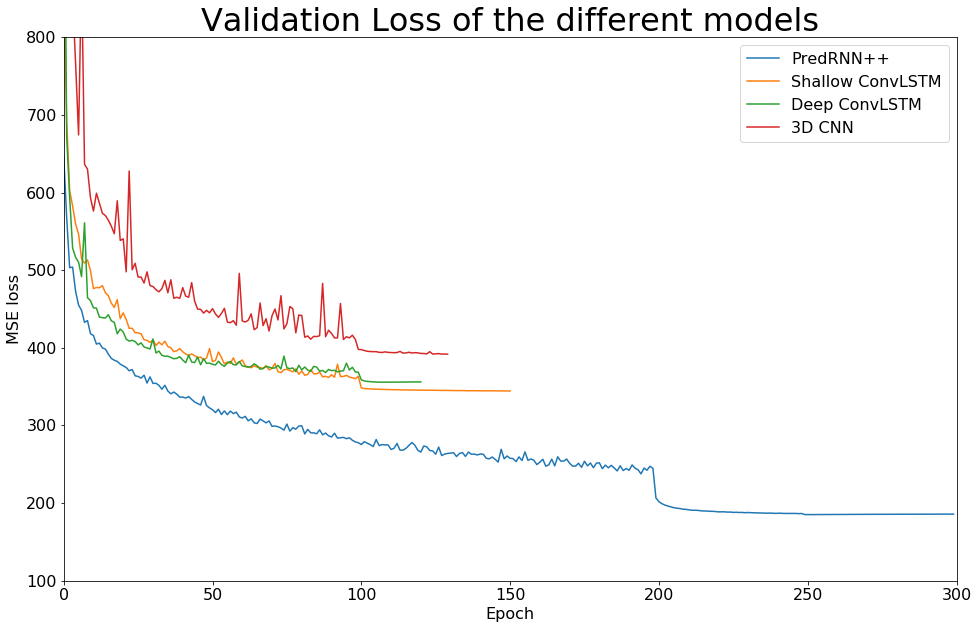

In [536]:
ax = val_plotter.plot(figsize=(16,10))
ax.set_ylim(100,800)
ax.set_xlim(0,300)
ax.set_title('Validation Loss of the different models',fontsize=32)
ax.set_ylabel('MSE loss',fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(prop={'size':16})
fig = ax.get_figure()
fig.savefig('ValidationCurve.pdf')

#### Count Params

In [37]:
import torch

In [39]:
import sys
sys.path.append('../')

In [64]:
from model_architectures.conv_lstm_shallow.ShallowConvLstm import ConvLSTMModel
from model_architectures.pred_rnn_pp.PredRNNPP_less_mem import PredRNNPP
from model_architectures.conv_lstm_deep.DeepConvLstm import EF,Encoder,Forecaster,ConvLSTM
from model_architectures.conv_lstm_deep.architecture_specifications import encoder_architecture, forecaster_architecture
###### Define encoder #####
from model_architectures.conv_3d.CNN_3D_12_to_10_with_RELU import CNN3D
enc_arch = encoder_architecture(5, 'cpu', 12)
encoder = Encoder(enc_arch[0],enc_arch[1]).to('cpu')

###### Define decoder #####
seq_output = 10

fore_arch = forecaster_architecture(5, 'cpu', seq_output)

forecaster=Forecaster(fore_arch[0],fore_arch[1],seq_output).to('cpu')

deep_model = EF(encoder,forecaster)

In [65]:
CNN_model = CNN3D()
shallow_model = ConvLSTMModel(100,12,10,5,True)
pred_rnn_pp_model = PredRNNPP([5,12,100,100],12,10,5,[64,64,64,64],'cpu')

In [66]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(shallow_model))
print(count_parameters(pred_rnn_pp_model))
print(count_parameters(deep_model))
print(count_parameters(CNN_model))

463697
2468433
12147553
1237121


### MSE / SSIM / PSNR per frame 

In [ ]:
mse_frame_cnn = pd.read_csv(RESULTS_PATH+cnn_3d+'mse_frame_timestep.csv',header=None).values
mse_frame_predrnn = pd.read_csv(RESULTS_PATH+predrnn_full+'mse_frame_timestep.csv',header=None).values
mse_frame_shallow = pd.read_csv(RESULTS_PATH+shallow_conv_lstm+'mse_frame_timestep.csv',header=None).values
mse_frame_deep = pd.read_csv(RESULTS_PATH+deep_conv_lstm+'mse_frame_timestep.csv',header=None).values

In [412]:
from skimage import measure 

tot = 0
frame_wise_SSIM_deep = [0] * 10
frame_wise_SSIM_shallow = [0] * 10
frame_wise_SSIM_cnn = [0] * 10
frame_wise_SSIM_pred_rnn = [0] * 10
frame_wise_PSNR_deep = [0] * 10
frame_wise_PSNR_shallow = [0] * 10
frame_wise_PSNR_cnn = [0] * 10
frame_wise_PSNR_pred_rnn = [0] * 10
for i in range(y.shape[0]):
    for j in range(y.shape[3]):
        tot+=1
        frame_wise_SSIM_deep[j] += measure.compare_ssim(y[i,...,j],pred_deep[i,...,j])/y.shape[0]
        frame_wise_SSIM_shallow[j] += measure.compare_ssim(y[i,...,j],pred_shallow[i,...,j])/y.shape[0]
        frame_wise_SSIM_cnn[j] += measure.compare_ssim(y[i,...,j],pred_cnn[i,...,j])/y.shape[0]
        frame_wise_SSIM_pred_rnn[j] += measure.compare_ssim(y[i,...,j],pred_pred_rnn_full[i,...,j])/y.shape[0]
        frame_wise_PSNR_deep[j] += measure.compare_psnr(y[i,...,j],pred_deep[i,...,j],data_range=37)/y.shape[0]
        frame_wise_PSNR_shallow[j] += measure.compare_psnr(y[i,...,j],pred_shallow[i,...,j],data_range=37)/y.shape[0]
        frame_wise_PSNR_cnn[j] += measure.compare_psnr(y[i,...,j],pred_cnn[i,...,j],data_range=37)/y.shape[0]
        frame_wise_PSNR_pred_rnn[j] += measure.compare_psnr(y[i,...,j],pred_pred_rnn_full[i,...,j],data_range=37)/y.shape[0]


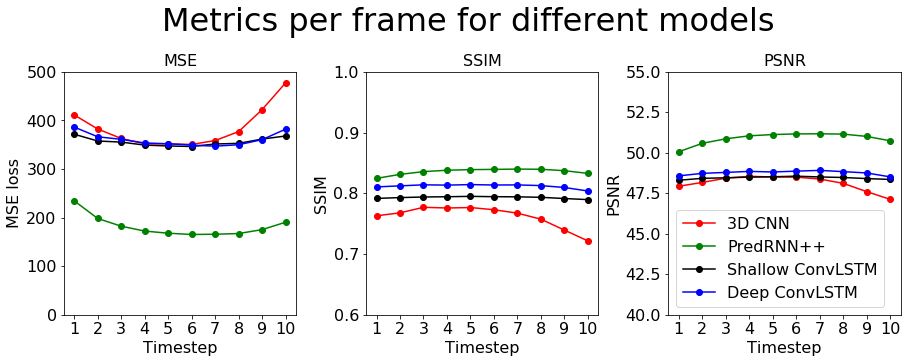

In [541]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
x = np.arange(10) + 1
ax[0].set_ylim(0,500)
ax[0].plot(x,mse_frame_cnn,'r-o',label='3D CNN')
ax[0].plot(x,mse_frame_predrnn,'g-o',label='PredRNN++')
ax[0].plot(x,mse_frame_shallow,'k-o',label='Shallow ConvLSTM')
ax[0].plot(x,mse_frame_deep,'b-o',label='Deep ConvLSTM')
ax[0].set_title('MSE',fontsize=16)
ax[0].set_ylabel('MSE loss',fontsize=16)
ax[0].set_xlabel('Timestep',fontsize=16)
ax[0].set_xticks(np.arange(10)+1)

ax[1].set_ylim(0.6,1)
ax[1].plot(x,frame_wise_SSIM_cnn,'r-o',label='3D CNN')
ax[1].plot(x,frame_wise_SSIM_pred_rnn,'g-o',label='PredRNN++')
ax[1].plot(x,frame_wise_SSIM_shallow,'k-o',label='Shallow ConvLSTM')
ax[1].plot(x,frame_wise_SSIM_deep,'b-o',label='Deep ConvLSTM')
ax[1].set_title('SSIM',fontsize=16)
ax[1].set_ylabel('SSIM',fontsize=16)
ax[1].set_xlabel('Timestep',fontsize=16)
ax[1].set_xticks(np.arange(10)+1)


ax[2].set_ylim(40,55)
ax[2].plot(x,frame_wise_PSNR_cnn,'r-o',label='3D CNN')
ax[2].plot(x,frame_wise_PSNR_pred_rnn,'g-o',label='PredRNN++')
ax[2].plot(x,frame_wise_PSNR_shallow,'k-o',label='Shallow ConvLSTM')
ax[2].plot(x,frame_wise_PSNR_deep,'b-o',label='Deep ConvLSTM')
ax[2].set_title('PSNR',fontsize=16)
ax[2].set_ylabel('PSNR',fontsize=16)
ax[2].set_xlabel('Timestep',fontsize=16)
ax[2].set_xticks(np.arange(10)+1)
ax[2].legend(prop={'size':16})

fig.suptitle('Metrics per frame for different models',fontsize=32)
fig.subplots_adjust(top=0.8,wspace=0.30)
fig.savefig('Metrics_per_frame.pdf')

#### MSE distribution 

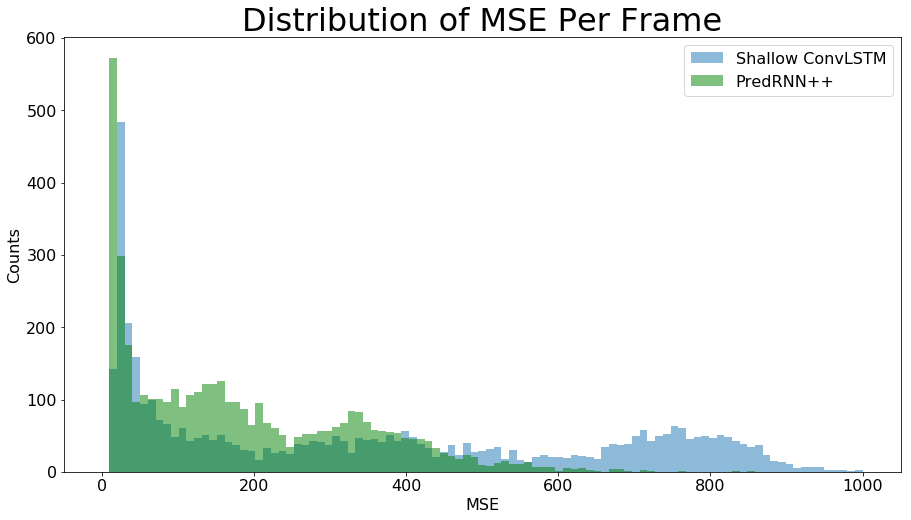

In [538]:
bins = np.linspace(0,1000,100)
alpha = 0.5
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(((y - pred_shallow)**2).sum(axis = (1,2)).flatten(),bins,alpha = alpha,label='Shallow ConvLSTM')
# ax.hist(((y - pred_deep)**2).sum(axis = (1,2)).flatten(),bins,alpha =alpha,color='k')
ax.hist(((y - pred_pred_rnn_full)**2).sum(axis = (1,2)).flatten(),bins,alpha =alpha,color='g',label='PredRNN++')
# ax.hist(((y - pred_cnn)**2).sum(axis = (1,2)).flatten(),bins,alpha =alpha,color='r')
ax.legend(prop={'size':16})
ax.set_title('Distribution of MSE Per Frame',fontsize=32)
ax.set_ylabel('Counts',fontsize=16)
ax.set_xlabel('MSE',fontsize=16)
fig.savefig('MSE_distribution.pdf')

### IMSHOW of alot of predictions

In [329]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=-0.42,vmax=30)
colormap = 'nipy_spectral'
coords = (58,50)
batch  = 99

In [330]:
y.shape

(430, 100, 100, 10)

In [543]:
rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)


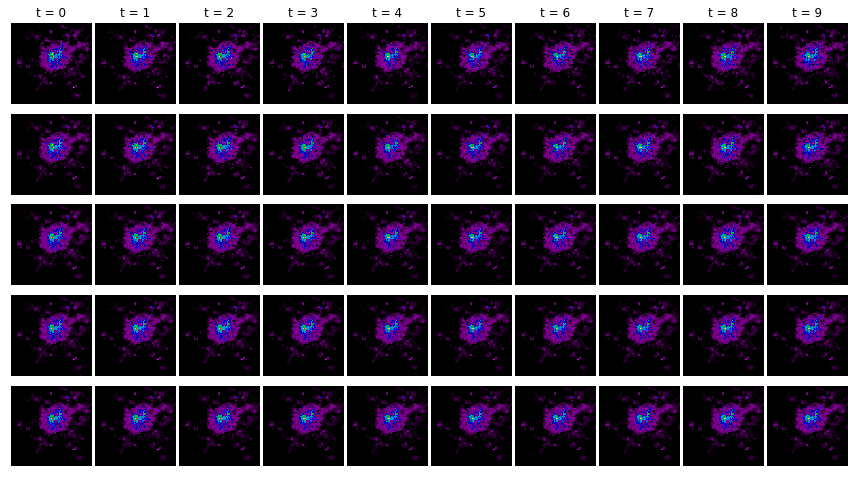

In [547]:
fig, ax = plt.subplots(5,10, figsize = (15,10))

names = ['Ground Truth' , 'PredRNN++', '3D CNN', 'Shallow ConvLSTM', 'Deep ConvLSTM']
data =  [y,pred_pred_rnn_full,pred_cnn,pred_shallow,pred_deep]
for i,(exp,name) in enumerate(zip(data,names)):
    for t in range(10):
        ax[i,t].imshow(exp[batch,...,t],origin='lower',norm=norm,cmap=colormap)
#         ax[i,t].axis('off')
#     ax[i,0].set_ylabel(name,rotation = 0)
for t in range(10):
    ax[0,t].set_title('t = ' + str(t))

plt.subplots_adjust(wspace=0.04,hspace=-0.5)
fig.savefig('Full_predictions.png',dpi=600)

In [353]:
norm = Normalize(vmin=0,vmax=30)


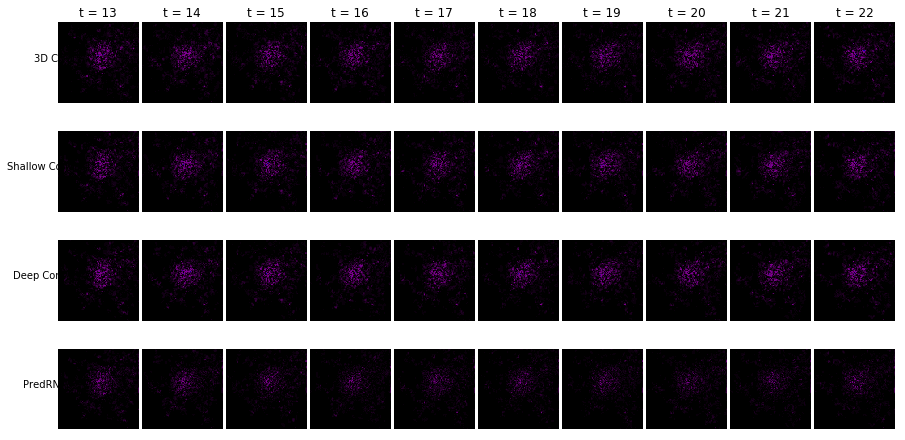

In [360]:
fig, ax = plt.subplots(4,10, figsize = (15,10))

names = ['3D CNN', 'Shallow ConvLSTM', 'Deep ConvLSTM', 'PredRNN++']
data =  [pred_cnn,pred_shallow,pred_deep,pred_pred_rnn_full]
for i,(exp,name) in enumerate(zip(data,names)):
    for t in range(10):
        ax[i,t].imshow(np.abs(y[batch,...,t] - exp[batch,...,t]),origin='lower',norm=norm,cmap=colormap)
#         ax[i,t].axis('off')
    ax[i,0].set_ylabel(name,rotation = 0)

for t in range(10):
    ax[0,t].set_title('t = ' + str(t+13))

plt.subplots_adjust(wspace=0.04,hspace=-0.5)